# Import

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
FILE_NAME = "PQ2MON - Orders - Weeks -1 to -109 (1).xls.xlsx"
DF = pd.read_excel(FILE_NAME)
DF.head(5)

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency
0,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-04-16,2019-04-18,3790088,0
1,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-05-07,2019-05-09,3810953,0
2,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-06-07,2019-06-10,3841144,0
3,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-07-09,2019-07-11,3869973,0
4,Corporate,3M Canada Company,ROAD,Standard,DRY,PQ2MON,USMWIA,"STE THERESE,PQ/TE to PRAIRIE DU CHIEN,WI/",2020-02-26,2020-03-02,4066936,0


In [3]:
DF

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency
0,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-04-16,2019-04-18,3790088,0
1,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-05-07,2019-05-09,3810953,0
2,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-06-07,2019-06-10,3841144,0
3,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-07-09,2019-07-11,3869973,0
4,Corporate,3M Canada Company,ROAD,Standard,DRY,PQ2MON,USMWIA,"STE THERESE,PQ/TE to PRAIRIE DU CHIEN,WI/",2020-02-26,2020-03-02,4066936,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23864,Spot,Traffic Tech,ROAD,Standard,DRY,PQ2MON,BC2VAN,"ST LAURENT,PQ/IL to DELTA,BC/",2020-06-18,2020-06-22,4192727,0
23865,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-18,4074001,0
23866,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-20,4073978,0
23867,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-13,2020-02-18,4074019,0


In [4]:
DAYS_0 = pd.Timedelta(days=0)
DAYS_1 = pd.Timedelta(days=1)
DAYS_14 = pd.Timedelta(days=14)

# Helper Functions

## Clean Data

In [5]:
# Clean the irrelevant columns, only keeping the rows that has PQ data
# internal are orders that starts and completes within the PQ region itself.
# external are orders that goes from anyhwere in PQ to other region and vice versa
def get_df_clean(df,select=None,drop=["Customer Group","Requested Mode","Order #","Avg. Weekly Frequency","Lane ID - City to City","Client Grouping1"]):
    df_PQ = df[df['Shipper Region3'].str.contains('PQ')|df['Consignee Region3'].str.contains('PQ')].drop(columns=drop)
    df_PQ.loc[:,'Shipper Region3'].fillna("UNKNOWN",inplace=True)
    df_PQ.loc[:,'Consignee Region3'].fillna("UNKNOWN",inplace=True)
    df_PQ_int = df_PQ[df_PQ["Shipper Region3"].str.contains('PQ') & df_PQ["Consignee Region3"].str.contains('PQ')]
    df_PQ_ext = df_PQ.drop(index=df_PQ_int.index)
    if select == "internal": return df_PQ_int
    elif select == "external": return df_PQ_ext
    else: return df_PQ

In [6]:
# Demo
DF_CLEAN = get_df_clean(DF)
DF_CLEAN

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
...,...,...,...,...,...,...
23864,Standard,DRY,PQ2MON,BC2VAN,2020-06-18,2020-06-22
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20
23867,Standard,REEFER,PQ2MON,ABNEDM,2020-02-13,2020-02-18


In [7]:
df_PQ_ext = get_df_clean(DF,'external')
print(len(df_PQ_ext))
df_PQ_ext.head(5)

22364


,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02


In [8]:
df_PQ_int = get_df_clean(DF,'internal')
print(len(df_PQ_int))
df_PQ_int.head(5)

710


,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
11,Standard,DRY,PQ2OTT,PQ2MON,2019-10-25,2019-10-28
12,Standard,DRY,PQ2OTT,PQ2MON,2019-10-07,2019-10-09
13,Standard,DRY,PQ2OTT,PQ2MON,2019-11-08,2019-11-12
14,Standard,DRY,PQ2OTT,PQ2MON,2019-12-03,2019-12-03
15,Standard,DRY,PQ2OTT,PQ2MON,2019-12-30,2020-01-03


## Getting the statistics

In [9]:
# Get the counts for a schedule, such as inbound and out bound figures. Also calculates the imbalance levels
def get_df_count(df,start_date=None,end_date=None,fill_missing=False):    
    if start_date == None: start_date = get_earliest(df)
    if end_date == None: end_date = get_latest(df)
    df_out = df[df['Shipper Region3'].str.contains('PQ')]['Start Date'].value_counts().sort_index(axis=0)
    df_in = df[df['Consignee Region3'].str.contains('PQ')]['Completion Date'].value_counts().sort_index(axis=0)
    df_count = pd.concat([df_out, df_in],axis=1).fillna(0, downcast='infer').rename(columns={"Start Date": "Outbound", "Completion Date": "Inbound"})
    if fill_missing:
        df_count = pd.DataFrame(index=get_dates(start_date,end_date)).join(df_count,how='outer').fillna(0)    
    df_count["Imbalance"] = df_count["Inbound"] - df_count["Outbound"]
    df_count["cImbalance"] = df_count["Imbalance"].cumsum()
    return df_count[start_date:end_date]

# Get the imbalance level of the date
def get_imb(df,date,col="Imbalance"):
    if (col == "Imbalance" or col == "cImbalance") and date in df.index:
        return df.loc[date,col]
    
def get_dates(start_date,end_date):
    return [start_date + i*DAYS_1 for i in range(int((end_date-start_date).days+1))]

def get_earliest(df,col=["Start Date","Completion Date"]):
    if col == ["Start Date","Completion Date"]:
        return df.loc[:,col].min().min()
    else:
        return df.loc[:,col].min()
    
def get_latest(df,col=["Start Date","Completion Date"]):
    if type(col) == list and len(col) > 1:
        return df.loc[:,col].max().max()
    else:
        return df.loc[:,col].max()

In [10]:
#Demo
DF_COUNT = get_df_count(DF_CLEAN)
DF_COUNT

,Outbound,Inbound,Imbalance,cImbalance
2019-03-13,1,0,-1,-1
2019-03-19,2,0,-2,-3
2019-03-20,2,0,-2,-5
2019-03-21,1,0,-1,-6
2019-03-22,12,0,-12,-18
...,...,...,...,...
2021-04-20,21,20,-1,251
2021-04-21,12,25,13,264
2021-04-22,10,30,20,284
2021-04-23,11,24,13,297


In [11]:
#Demo
start_date = pd.Timestamp(2019,3,13,0)
end_date = pd.Timestamp(2019,3,19,0)

# df_count = get_df_count(DF_CLEAN,start_date,end_date)
df_count = get_df_count(DF_CLEAN,start_date,end_date,fill_missing=True)
print(get_imb(df_count,start_date))
df_count

-1.0


,Outbound,Inbound,Imbalance,cImbalance
2019-03-13,1.0,0.0,-1.0,-1.0
2019-03-14,0.0,0.0,0.0,-1.0
2019-03-15,0.0,0.0,0.0,-1.0
2019-03-16,0.0,0.0,0.0,-1.0
2019-03-17,0.0,0.0,0.0,-1.0
2019-03-18,0.0,0.0,0.0,-1.0
2019-03-19,2.0,0.0,-2.0,-3.0


In [12]:
#Demo
start_date = pd.Timestamp(2019,3,13,0)
end_date = pd.Timestamp(2019,3,19,0)

get_dates(start_date,end_date)

[Timestamp('2019-03-13 00:00:00'),
 Timestamp('2019-03-14 00:00:00'),
 Timestamp('2019-03-15 00:00:00'),
 Timestamp('2019-03-16 00:00:00'),
 Timestamp('2019-03-17 00:00:00'),
 Timestamp('2019-03-18 00:00:00'),
 Timestamp('2019-03-19 00:00:00')]

In [13]:
#Demo
df = DF_CLEAN

get_earliest(df)
# get_earliest(df,'Start Date')
# get_earliest(df,'Completion Date')
# get_latest(df)
# get_latest(df,'Completion Date')

Timestamp('2019-01-31 00:00:00')

In [14]:
# Get all the orders that start and/or completes on a specific day
def get_df_day(df,date,col=['Start Date','Completion Date'],region='PQ'):
    if region == 'any': region = ''
    cond_out = df['Shipper Region3'].str.startswith(region) & (df['Start Date'] == date)
    cond_in = df['Consignee Region3'].str.startswith(region) & (df['Completion Date'] == date)
    if col == 'Start Date': return df[cond_out]
    elif col == 'Completion Date': return df[cond_in]
    elif col == ['Start Date','Completion Date']: return df[cond_out | cond_in]

# Get all orders that starts and/or completes in a specific time span
def get_df_span(df,start_date=None,end_date=None,col=['Start Date','Completion Date'],region='PQ'):
    if start_date == None: start_date = get_earliest(df)
    if end_date == None: end_date = get_latest(df)
    if region == 'any': region = ''
    cond_out = df['Shipper Region3'].str.startswith(region) & (df["Start Date"] >= start_date) & (df["Start Date"] <= end_date)
    cond_in = df['Consignee Region3'].str.startswith(region) & (df["Completion Date"] >= start_date) & (df["Completion Date"] <= end_date)
    if col == 'Start Date': return df[cond_out]
    elif col == 'Completion Date': return df[cond_in]
    elif col == ['Start Date','Completion Date']: return df[cond_out | cond_in]

In [15]:
# Aside: why I have to use .min().min()

In [16]:
df = DF_CLEAN
df.loc[:,"Start Date":"Completion Date"].min()

Start Date        2019-01-31
Completion Date   2019-03-24
dtype: datetime64[ns]

In [17]:
df.loc[:,"Start Date":"Completion Date"].min().min()

Timestamp('2019-01-31 00:00:00')

In [18]:
# Aside: How to view any region
df = DF_CLEAN
# date = get_earliest(df)
# get_df_day(df,date,region='any')

date = get_latest(df)
get_df_day(df,date,region='ON')

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
16576,Standard,REEFER,PQ2MON,ON2TOR,2021-04-23,2021-04-24
19304,Expedited,DRY,PQ2MON,ON2TOR,2021-04-23,2021-04-24


In [19]:
# Demo
df = DF_CLEAN
date1 = pd.Timestamp(2020,1,1,0)
date2 = pd.Timestamp(2020,1,7,0)

get_df_day(df,date2).sort_values(by=["Start Date","Completion Date"])
# get_df_day(df,date2,'Completion Date')
# get_df_day(df,date2,'Start Date')

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
14726,Standard,DRY,USMWMO,PQ2MON,2019-12-27,2020-01-07
4068,Standard,REEFER,USSWCS,PQ2MON,2019-12-31,2020-01-07
5490,Standard,HEATER,USSEE,PQ2QUE,2020-01-02,2020-01-07
13780,Expedited,DRY,ABSCAL,PQ2MON,2020-01-02,2020-01-07
14073,Standard,DRY,SK2SAS,PQ2S,2020-01-02,2020-01-07
58,Standard,DRY,USMNMI,PQ2S,2020-01-03,2020-01-07
10730,Standard,DRY,ON2TOR,PQ2MON,2020-01-05,2020-01-07
2148,Standard,HEATER,ON2TOR,PQ2MON,2020-01-06,2020-01-07
6210,Standard,DRY,ON2TOR,PQ2MON,2020-01-06,2020-01-07
7123,Standard,DRY,ON2TOR,PQ2MON,2020-01-06,2020-01-07


In [20]:
# Demo
df = DF_CLEAN
date1 = pd.Timestamp(2020,1,1,0)
date2 = pd.Timestamp(2020,1,7,0)

get_df_span(df,date1,date2)
# get_df_span(df,start_date=None,end_date=date2,how='inner')
# get_df_span(df,date1,date2,'inner')

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
15,Standard,DRY,PQ2OTT,PQ2MON,2019-12-30,2020-01-03
58,Standard,DRY,USMNMI,PQ2S,2020-01-03,2020-01-07
619,Standard,DRY,PQ2MON,USMEON,2020-01-06,2020-01-08
640,Standard,DRY,PQ2MON,USMEON,2020-01-03,2020-01-06
650,Standard,DRY,PQ2MON,USMEON,2020-01-06,2020-01-08
...,...,...,...,...,...,...
22182,Expedited,DRY,PQ2MON,ABNEDM,2020-01-04,2020-01-06
22183,Expedited,DRY,PQ2MON,ABNEDM,2020-01-06,2020-01-09
22821,Expedited,HEATER,PQ2MON,ABSCAL,2020-01-07,2020-01-09
22917,Expedited,HEATER,PQ2MON,MB2WIN,2020-01-03,2020-01-05


In [21]:
# Get a number of orders that can be moved to other days
def get_cand_orders(df,date,col=['Start Date','Completion Date'],num_orders=None):
    df_cand = get_df_day(df,date,col)
    if num_orders == None: num_orders = len(df_cand)
    else: num_orders = int(min(len(df_cand),num_orders))
    return df_cand.iloc[:num_orders].sort_values(by=col)

In [22]:
# Demo
df = DF_CLEAN
date1 = pd.Timestamp(2020,1,1,0)
date2 = pd.Timestamp(2020,1,7,0)

# get_cand_orders(df,date2) # Get all the candidate orders
get_cand_orders(df,date2,'Start Date',num_orders=20) # Get a certain number of the candidate orders on that day

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
9770,Standard,DRY,PQ2S,USMEIS,2020-01-07,2020-01-09
13457,Expedited,DRY,PQ2MON,ABSCAL,2020-01-07,2020-01-09
13475,Expedited,HEATER,PQ2MON,ABSCAL,2020-01-07,2020-01-08
13735,Standard,DRY,PQ2S,MB2ONE,2020-01-07,2020-01-10
16546,Standard,DRY,PQ2MON,USEASW,2020-01-07,2020-01-10
17500,Expedited,DRY,PQ2MON,MB2WIN,2020-01-07,2020-01-08
19335,Standard,DRY,PQ2MON,USILCH,2020-01-07,2020-01-09
19336,Standard,DRY,PQ2MON,USILCH,2020-01-07,2020-01-09
19507,Standard,REEFER,PQ2MON,ABNEDM,2020-01-07,2020-01-13
20708,Standard,REEFER,PQ2MON,ON2N,2020-01-07,2020-01-08


In [23]:
# Actually reschedule an order in the scheduling table (by overwriting the date in column col)
# Returns the modified schedule and the updated counts
def move(df,index,to_date,col='Start Date'):
    df_resched = df.copy()
    df_resched.loc[index,col] = to_date
    return df_resched

In [24]:
# Demo
df = DF_CLEAN
index = df.index[5]
to_date = df.loc[index,'Start Date'] + DAYS_1

df_resched = move(df,index,to_date,'Start Date')
print(df.loc[index],'\n')
print(df_resched.loc[index])

Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-08 00:00:00
Completion Date            2020-04-10 00:00:00
Name: 5, dtype: object 

Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-09 00:00:00
Completion Date            2020-04-10 00:00:00
Name: 5, dtype: object


In [25]:
# Get the bound (earliest/latest) dates in between which an order have to start and complete.
# By default the assumption would be that the order must start in between 14 days prior to 
# originally scheduled all the way to 0 days before; and must completes within 1 day prior to 1 day after
# originally scheduled.
# Because of this, we based the completion date on the date in the ORIGINAL schedule (i.e DF_CLEAN)
def get_bound_dates(index):
    df = DF_CLEAN
    compl_date = df.loc[index,'Completion Date']
    e_start,l_start = compl_date - DAYS_14, compl_date - DAYS_0
    e_compl,l_compl = compl_date - DAYS_1, compl_date + DAYS_1
    return {"e_start":e_start,"l_start":l_start,"e_compl":e_compl,"l_compl":l_compl}

# Checks if an order violates any boundaries, especially after rescheduled
def check_bound_violations(df,index,check_start=True,check_compl=True):
    start = df.loc[index,'Start Date'] 
    compl = df.loc[index,'Completion Date']
    e_start,l_start,e_compl,l_compl = get_bound_dates(index).values()
    start_viol = check_start and (start < e_start or start > l_start)
    compl_viol = check_compl and (compl < e_compl or compl > l_compl)
    return start_viol or compl_viol

In [26]:
# Demo
df = DF_CLEAN
index = df.index[5]

print(df.loc[index,'Start Date':'Completion Date'],'\n')
print("Violation: ",check_bound_violations(df,index))
get_bound_dates(index)

Start Date         2020-04-08 00:00:00
Completion Date    2020-04-10 00:00:00
Name: 5, dtype: object 

Violation:  False


{'e_start': Timestamp('2020-03-27 00:00:00'),
 'l_start': Timestamp('2020-04-10 00:00:00'),
 'e_compl': Timestamp('2020-04-09 00:00:00'),
 'l_compl': Timestamp('2020-04-11 00:00:00')}

In [27]:
# Demo
df = DF_CLEAN
index = df.index[5]
to_date = df.loc[index,'Start Date'] + 3*DAYS_1

df_resched = move(df,index,to_date,'Start Date')
print(df.loc[index],'\n')
print(df_resched.loc[index])

print("Violation: ",check_bound_violations(df_resched,index))

Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-08 00:00:00
Completion Date            2020-04-10 00:00:00
Name: 5, dtype: object 

Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-11 00:00:00
Completion Date            2020-04-10 00:00:00
Name: 5, dtype: object
Violation:  True


In [31]:
# Get orders that have the same values in columns in col
# Used mostly to determine the shortest/longest expected time for order of the same type
def get_df_similar_orders(df,index,col=["Priority","Requested Trailer Class","Shipper Region3","Consignee Region3"]):
    order = df.loc[index,col]
    df_dup = df.loc[:,col]
    df_dup = df_dup[df_dup == order].dropna()
    return df.loc[df_dup.index,:]

In [32]:
# Demo
df = DF_CLEAN
index = df.index[5]

print(df.loc[index],'\n')
get_df_similar_orders(df,index)
# get_df_similar_orders(df,index,col=["Shipper Region3","Consignee Region3"]) # Only getting orders with same Shipper Region and Consignee Region

Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-08 00:00:00
Completion Date            2020-04-10 00:00:00
Name: 5, dtype: object 



,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
5,Standard,DRY,PQ2MON,USMWIA,2020-04-08,2020-04-10
6,Standard,DRY,PQ2MON,USMWIA,2020-05-11,2020-05-13
7,Standard,DRY,PQ2MON,USMWIA,2020-12-01,2020-12-04
8,Standard,DRY,PQ2MON,USMWIA,2021-03-11,2021-03-14
9,Standard,DRY,PQ2MON,USMWIA,2021-03-17,2021-03-22
16075,Standard,DRY,PQ2MON,USMWIA,2019-12-03,2019-12-06
16076,Standard,DRY,PQ2MON,USMWIA,2019-12-18,2019-12-20
16077,Standard,DRY,PQ2MON,USMWIA,2019-12-29,2020-01-02
16078,Standard,DRY,PQ2MON,USMWIA,2020-01-13,2020-01-15


In [33]:
# Records the changes in days made to the "Start Date" and "Completion Date" of the original schedule
def get_df_sched_diff(df_sched,df_resched):
    df = df_resched.loc[:,"Start Date":"Completion Date"] - df_sched.loc[:,"Start Date":"Completion Date"]
    return df[df != DAYS_0].dropna(how='all').fillna(DAYS_0)

def get_df_count_diff(df_count,df_recount):
    df = df_recount.loc[:,:] - df_count.loc[:,:]
    return df[df != 0].dropna(how='all').fillna(0)

In [34]:
# Demo
date1 = pd.Timestamp(2021,1,1,0)

df = DF_CLEAN.copy()
index = df.index[5]
df_resched = move(df,index,date1,'Completion Date')

print(df.loc[index])
print(df_resched.loc[index])
get_df_sched_diff(df,df_resched)

Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-08 00:00:00
Completion Date            2020-04-10 00:00:00
Name: 5, dtype: object
Priority                              Standard
Requested Trailer Class                    DRY
Shipper Region3                         PQ2MON
Consignee Region3                       USMWIA
Start Date                 2020-04-08 00:00:00
Completion Date            2021-01-01 00:00:00
Name: 5, dtype: object


,Start Date,Completion Date
5,0 days,266 days


In [35]:
date1 = pd.Timestamp(2021,1,1,0)

get_df_day(df_resched,date1)
# get_df_count(df_resched,date1,date1+DAYS_1)

# df_count[df_count != df_recount].dropna(how='all')

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
2695,Expedited,DRY,BC2VAN,PQ2MON,2020-12-29,2021-01-01
2696,Expedited,DRY,BC2VAN,PQ2MON,2020-12-30,2021-01-01
10173,Standard,DRY,PQ2MON,ABNEDM,2021-01-01,2021-01-07


In [36]:
get_df_count(df_resched,date1-3*DAYS_1,date1+3*DAYS_1)

,Outbound,Inbound,Imbalance,cImbalance
2020-12-29,18,17,-1,127
2020-12-30,21,18,-3,124
2020-12-31,15,23,8,132
2021-01-01,1,2,1,133
2021-01-02,12,10,-2,131
2021-01-03,8,3,-5,126
2021-01-04,20,23,3,129


# Algorithm

## Pseudo Code

Note:

    imb = inbound - outbound (how many spare trailers)  
    imb > 0 : there are spare trailers for the day (that can otherwise be utilized)    
    imb < 0 : there are shortage of trailers for the day (we likely have to hire outside trailers) 
    imb = 0 : there are just enough trailers 
    day.imb < next.imb : there are less spare trailers today than tomorrow/ or there are more of a shortage
    day.imb > next.imb : there are more spare trailers today than tomorrow/ or there are less of a shortage

Idea:
```
for date in all_days:
    next = day.next
    if (date.imb > 0): 
    # if we have spare trailers today
        if (next.imb > date.imb):
        # if tomorrow we have even more spare trailers than today
            #
            # We defer some outbound order today to tomorrow so we can utilize tomorrow's larger spare trailers        
            #
        elif (next.imb < date.imb):
        # if tomorrow there's less spare trailers, or even a shortage 
            #
            # We take in tomorrow outbound orders so we can utilize today's larger spare trailers
            #
            
    elif (date.imb < 0): 
    # if we are short of trailers today:
        if (next.imb > date.imb):
        # if we are less short of trailers tomorrow, or even have spare trailers
            #
            # We ask some inbound order to arrive sooner (today, as opposed to tomorrow)
            #
        elif (next.imb < date.imb):
        # if we are even more short of trailers tomorrow
            #
            # we allow some inbound order today to complete tomorrow
            #

```

## Code

In [37]:
def get_df_rescheduled(df,start_date=None,end_date=None):
    df_resched = get_df_span(df,start_date,end_date)
    df_recount = get_df_count(df,start_date,end_date,True)
    dates = df_recount.index
    
    for date in dates[:-1]:
        next_ = date + DAYS_1
        df_recount = get_df_count(df_resched,start_date,end_date,True)
        date_imb = get_imb(df_recount,date)
        next_imb = get_imb(df_recount,next_)
        
        if date_imb > 0:
            if date_imb < next_imb: # if there's more truck coming in tomorrow
                num_orders = int((next_imb - date_imb)/2)
                fr,to = date,next_

                cand = get_cand_orders(df_resched,fr,'Start Date',num_orders)
                for index in cand.index:
                    e_start,l_start,e_compl,l_compl = get_bound_dates(index).values()
                    if e_start <= to and to <= l_start:
                        df_resched = move(df_resched,index,to,col="Start Date")

            elif date_imb > next_imb:
                num_orders = int((date_imb - next_imb)/2)
                fr,to = next_,date

                cand = get_cand_orders(df_resched,fr,'Start Date',num_orders)
                for index in cand.index:
                    e_start,l_start,e_compl,l_compl = get_bound_dates(index).values()
                    if e_start <= to and to <= l_start:
                        df_resched = move(df_resched,index,to,col="Start Date")

        elif date_imb < 0: 
            if date_imb < next_imb: # if there's more truck coming in tomorrow
                num_orders = int((next_imb - date_imb)/2)
                fr,to = next_,date
                
                cand = get_cand_orders(df_resched,fr,'Completion Date',num_orders)
                for index in cand.index:
                    e_start,l_start,e_compl,l_compl = get_bound_dates(index).values()
                    if e_compl <= to and to <= l_compl:
                        df_resched = move(df_resched,index,to,col="Completion Date")

            elif date_imb > next_imb:
                num_orders = int((date_imb - next_imb)/2)
                fr,to = date,next_
                
                cand = get_cand_orders(df_resched,fr,'Completion Date',num_orders)
                for index in cand.index:
                    e_start,l_start,e_compl,l_compl = get_bound_dates(index).values()
                    if e_compl <= to and to <= l_compl:
                        df_resched = move(df_resched,index,to,col="Completion Date")
    return df_resched

In [38]:
start_date = pd.Timestamp(2020,1,1,0)
end_date = pd.Timestamp(2020,3,31,0)

df = DF_CLEAN
df_resched = get_df_rescheduled(df,start_date,end_date)
df_resched

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
15,Standard,DRY,PQ2OTT,PQ2MON,2019-12-30,2020-01-03
16,Standard,DRY,PQ2OTT,PQ2MON,2020-02-17,2020-02-19
26,Standard,DRY,PQ2OTT,PQ2S,2020-01-13,2020-01-14
27,Standard,DRY,PQ2OTT,PQ2S,2020-01-21,2020-01-22
...,...,...,...,...,...,...
23833,Standard,DRY,PQ2MON,BC2VAN,2020-03-12,2020-03-19
23834,Standard,DRY,PQ2MON,USMEIS,2020-02-04,2020-02-06
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20


In [39]:
df_sched = get_df_span(df,start_date,end_date)
df_sched

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
15,Standard,DRY,PQ2OTT,PQ2MON,2019-12-30,2020-01-03
16,Standard,DRY,PQ2OTT,PQ2MON,2020-02-18,2020-02-19
26,Standard,DRY,PQ2OTT,PQ2S,2020-01-13,2020-01-15
27,Standard,DRY,PQ2OTT,PQ2S,2020-01-21,2020-01-22
...,...,...,...,...,...,...
23833,Standard,DRY,PQ2MON,BC2VAN,2020-03-12,2020-03-19
23834,Standard,DRY,PQ2MON,USMEIS,2020-02-04,2020-02-06
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20


## Analysis and Correctness

Get the orders that were rescheduled, and how they were rescheduled

In [40]:
df_diff = get_df_sched_diff(df_sched,df_resched)
df_diff

,Start Date,Completion Date
16,-1 days,0 days
26,0 days,-1 days
28,-1 days,0 days
44,-1 days,0 days
46,-1 days,0 days
...,...,...
20969,-1 days,0 days
20970,-1 days,0 days
20972,-1 days,0 days
20993,-1 days,0 days


Before and After, side by side

In [41]:
df_sched.loc[df_diff.index].head(5)

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
16,Standard,DRY,PQ2OTT,PQ2MON,2020-02-18,2020-02-19
26,Standard,DRY,PQ2OTT,PQ2S,2020-01-13,2020-01-15
28,Standard,DRY,PQ2OTT,PQ2S,2020-02-25,2020-02-27
44,Standard,DRY,PQ2OTT,USMWNE,2020-03-13,2020-03-16
46,Standard,DRY,PQ2S,USMWMO,2020-01-10,2020-01-13


In [42]:
df_resched.loc[df_diff.index].head(5)

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
16,Standard,DRY,PQ2OTT,PQ2MON,2020-02-17,2020-02-19
26,Standard,DRY,PQ2OTT,PQ2S,2020-01-13,2020-01-14
28,Standard,DRY,PQ2OTT,PQ2S,2020-02-24,2020-02-27
44,Standard,DRY,PQ2OTT,USMWNE,2020-03-12,2020-03-16
46,Standard,DRY,PQ2S,USMWMO,2020-01-09,2020-01-13


Comparing the count of the old schedule vs the one for new schedule

In [43]:
df_count = get_df_count(df_sched)
df_count.head(5)

,Outbound,Inbound,Imbalance,cImbalance
2019-12-30,1,0,-1,-1
2020-01-01,3,0,-3,-4
2020-01-02,6,17,11,7
2020-01-03,18,14,-4,3
2020-01-04,7,1,-6,-3


In [44]:
df_recount = get_df_count(df_resched)
df_recount.head(5)

,Outbound,Inbound,Imbalance,cImbalance
2019-12-30,1,0,-1,-1
2020-01-01,3,7,4,3
2020-01-02,10,10,0,3
2020-01-03,14,14,0,3
2020-01-04,7,1,-6,-3


The changes made comapred to the original table

In [45]:
get_df_count_diff(df_count,df_recount).head(5)

,Outbound,Inbound,Imbalance,cImbalance
2020-01-01,0.0,7.0,7.0,7.0
2020-01-02,4.0,-7.0,-11.0,-4.0
2020-01-03,-4.0,0.0,4.0,0.0
2020-01-05,0.0,6.0,6.0,6.0
2020-01-06,-2.0,-6.0,-4.0,2.0


In [46]:
def plot_imb(df,marker='o',col="Imbalance"):
    firstDate = min(df.index)
    lastDate = max(df.index)
    plt.plot(df.index,df[col],marker)
    plt.plot([firstDate,lastDate],[0,0],'k-')

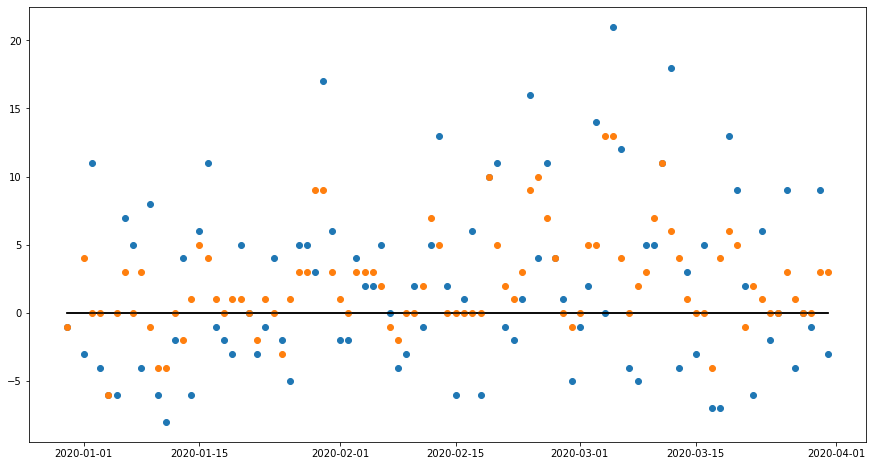

In [47]:
plt.figure(figsize=(15,8))
plot_imb(df_count)
plot_imb(df_recount)

In [48]:
def get_ci(series):
    mean = series.mean()
    std = series.std()
    return (mean-std,mean+std)

print(get_ci(df_count["Imbalance"]))
print(get_ci(df_recount["Imbalance"]))

(-4.287575665569294, 8.613662622091034)
(-1.4600727019397763, 5.786159658461516)


In [ ]:
df = DF_CLEAN
df_resched = get_df_rescheduled(df)

df_count = get_df_count(df)
df_recount = get_df_count(df_resched)

plt.figure(figsize=(15,8))
plot_imb(df_count)
plot_imb(df_recount)

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_count,x="Imbalance",kde=True)
sns.histplot(data=df_recount,x="Imbalance",color="red",kde=True)

## Our Strategy: Local Average

In [ ]:
start_date = pd.Timestamp(2020,2,1,0)
end_date = pd.Timestamp(2020,2,14)

df = get_df_span(DF_CLEAN,start_date,end_date)
df_count = get_df_count(df,start_date,end_date,True)

df_resched = get_df_rescheduled(df)
df_recount = get_df_count(df_resched,start_date,end_date,True)

pd.concat([df_count,df_recount],axis=1)

In [ ]:
get_ci(df_count["Imbalance"])

for every 3 days day1 day2 day3

    Compare day1.imb with avg(day1 + day2 + day3).imb
    Find candidates to move from day1 -> day2 or day3
    
    Compare day2.imb with avg(day2 + day3).imb
    Find candidates to move from day2 -> day1 or day3




In [ ]:
get_df_similar_orders()

In [ ]:
plt.figure(figsize=(15,8))
plot_imb(df_count,'-o')
plot_imb(df_recount,'-o')

In [ ]:
start_date = get_earliest(DF_CLEAN)
end_date = start_date + DAYS_14

df = get_df_span(DF_CLEAN,start_date,end_date)
df_count = get_df_count(df,start_date,end_date,True)

df_resched = get_df_rescheduled(df)
df_recount = get_df_count(df_resched,start_date,end_date,True)

pd.concat([df_count,df_recount],axis=1)

In [ ]:
start_date = get_earliest(DF_CLEAN)
end_date = start_date + DAYS_14

range(15.0)
# df[df['Start Date']==start_date]

In [ ]:
get_earliest(DF_CLEAN)

In [ ]:
# Monte Carlo?!